In [391]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import scipy.stats as sts
import seaborn as sns
from scipy import stats
from scipy.stats import linregress

In [380]:
age_raw = 'Resources/Age_Data.csv'
age_data = pd.read_csv(age_raw)
age_data.drop_duplicates(inplace=True)
age_data

,Unnamed: 0,Year,City,Age Range,Number in Range
0,0,2018,"Albany, NY",18 to 24 Years,21091
1,1,2018,"Albany, NY",75 Years & Over,5906
2,2,2018,"Albany, NY",45 to 54 Years,10514
3,3,2018,"Albany, NY",Under 5 Years,5491
4,4,2018,"Albany, NY",65 to 74 Years,6670
...,...,...,...,...,...
16231,16231,2013,"Tampa, FL",60 & 61 Years,7316
16232,16232,2013,"Tampa, FL",45 to 54 Years,49969
16233,16233,2013,"Tampa, FL",5 to 17 Years,52800
16234,16234,2013,"Tampa, FL",55 to 59 Years,22498


In [365]:
income_raw = 'Resources/Income_data.csv'
income_data = pd.read_csv(income_raw)
income_data = income_data[['Year', 'City', 'Median Income']]
income_data.head()

,Year,City,Median Income
0,2018,"Albany, NY",45500
1,2017,"Albany, NY",43790
2,2016,"Albany, NY",42335
3,2015,"Albany, NY",40949
4,2014,"Albany, NY",41099


(array([150., 348., 444., 288., 144.,  36.,  30.,  18.,   0.,  18.]),
 array([ 24820. ,  33575.6,  42331.2,  51086.8,  59842.4,  68598. ,
         77353.6,  86109.2,  94864.8, 103620.4, 112376. ]),
 <a list of 10 Patch objects>)

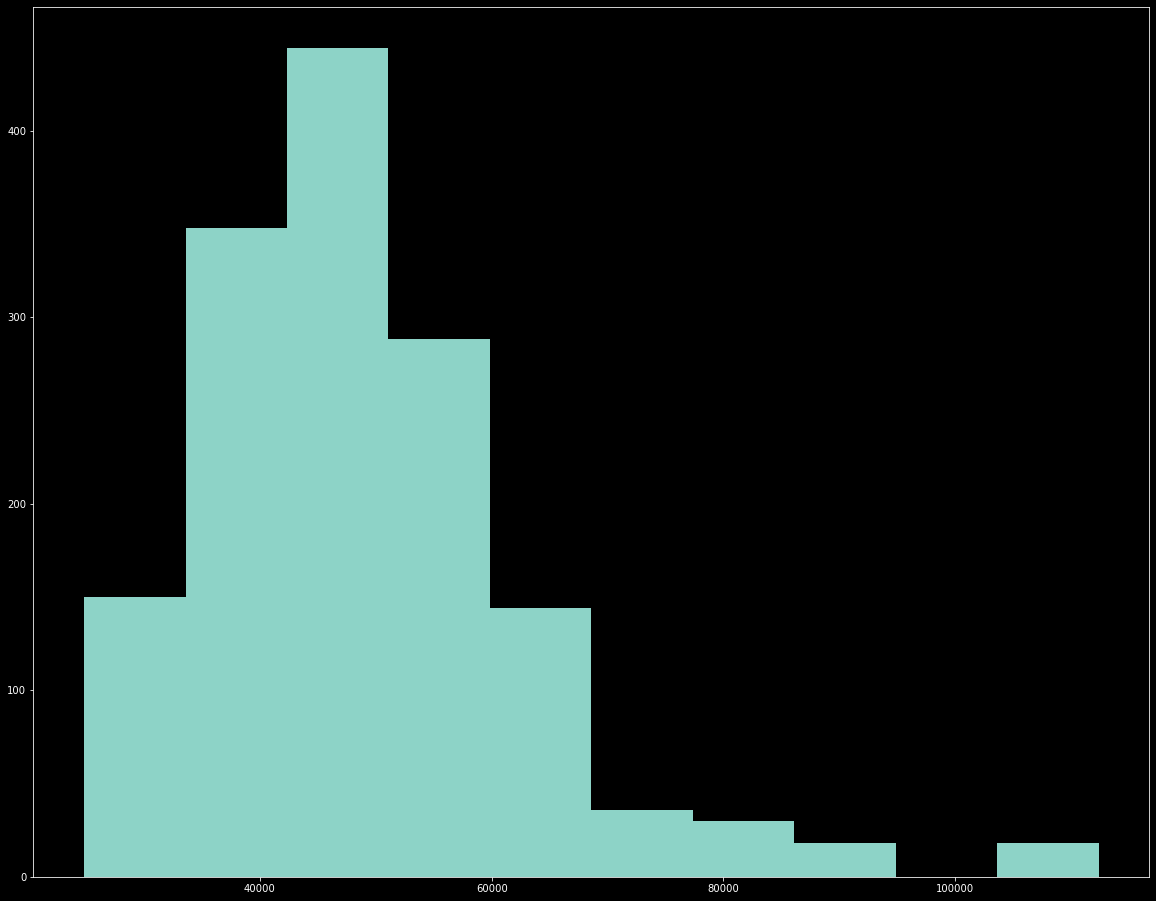

In [376]:
plt.hist(income_data['Median Income'])

In [366]:
avacado_raw = 'Resources/clean_avocado.csv'
avacado_data = pd.read_csv(avacado_raw)
avacado_data = avacado_data.rename(columns={'region':'City'})
city_data = 'Resources/City Geo Join Table.xlsx'
city_join = pd.read_excel(city_data)
avacado_city = pd.merge(avacado_data, city_join, on='City', how='left')
avacado_city = avacado_city[['year', 'AveragePrice','City, State']].rename(columns={'City, State':'City', 'year':'Year'})
avacado_city

,Year,AveragePrice,City
0,2015,1.22,"Albany, NY"
1,2015,1.24,"Albany, NY"
2,2015,1.17,"Albany, NY"
3,2015,1.06,"Albany, NY"
4,2015,0.99,"Albany, NY"
...,...,...,...
18717,2019,0.96,"Tampa, FL"
18718,2019,1.23,"Tampa, FL"
18719,2019,1.26,"Tampa, FL"
18720,2019,1.24,"Tampa, FL"


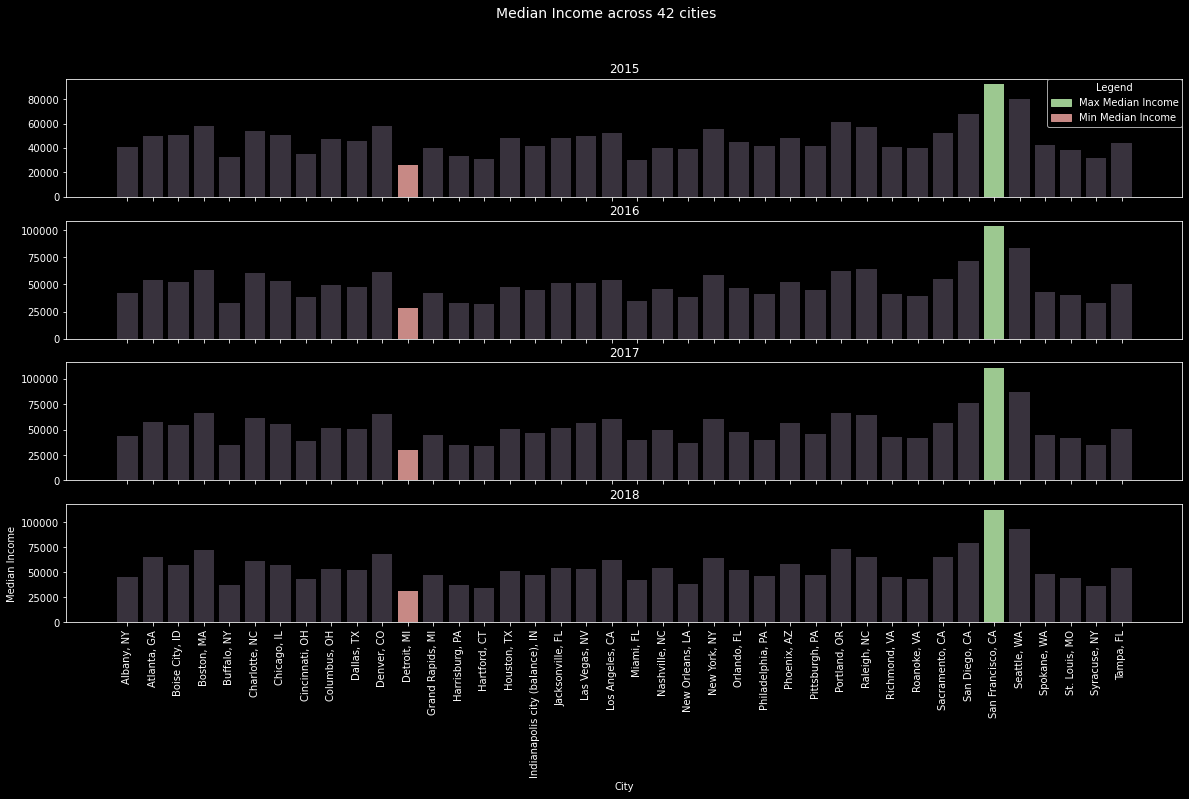

In [367]:
import matplotlib.patches as mpatches

#setup Groupbys, max, and min
income_groupby = income_data.copy().loc[income_data['Year'] >= 2015]
income_groupby = income_groupby.groupby(['Year', 'City', 'Median Income']).sum().reset_index().pivot(index='City', columns='Year').reset_index()
income_groupby.columns = ['City', '2015','2016', '2017', '2018']

income_max = income_data.copy().loc[income_data['Year'] >= 2015]
income_max = income_max.drop_duplicates().groupby(['Year'])['Median Income'].max().reset_index()
income_max = pd.merge(income_max, income_data.copy(), on=['Year', 'Median Income'], how='left').drop_duplicates().pivot(index='City', columns='Year').reset_index()
income_max.columns = ['City', '2015','2016', '2017', '2018']

income_min = income_data.copy().loc[income_data['Year'] >= 2015]
income_min = income_min.drop_duplicates().groupby(['Year'])['Median Income'].min().reset_index()
income_min = pd.merge(income_min, income_data.copy(), on=['Year', 'Median Income'], how='left').drop_duplicates().pivot(index='City', columns='Year').reset_index()
income_min.columns = ['City', '2015','2016', '2017', '2018']

#make plot fig
plt.rcParams['figure.figsize']=(20,10)
#set axis
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
#plot axis
ax1.bar(income_groupby['City'], income_groupby['2015'], color='#71647A', alpha=.5)
ax1.bar(income_max['City'], income_max['2015'], color = '#9CC890')
ax1.bar(income_min['City'], income_min['2015'], color= '#C78985')
ax1.set_title('2015')

ax2.bar(income_groupby['City'], income_groupby['2016'], color='#71647A', alpha=.5)
ax2.bar(income_max['City'], income_max['2016'], color = '#9CC890')
ax2.bar(income_min['City'], income_min['2016'],color= '#C78985')
ax2.set_title('2016')

ax3.bar(income_groupby['City'], income_groupby['2017'], color='#71647A', alpha=.5)
ax3.bar(income_max['City'], income_max['2017'], color = '#9CC890')
ax3.bar(income_min['City'], income_min['2017'],color= '#C78985')
ax3.set_title('2017')

ax4.bar(income_groupby['City'], income_groupby['2018'], color='#71647A', alpha=.5)
ax4.bar(income_max['City'], income_max['2018'], color = '#9CC890')
ax4.bar(income_min['City'], income_min['2018'],color= '#C78985')
ax4.set_title('2018')

#legend, formatting, etc.
max_patch = mpatches.Patch(color='#9CC890', label='Max Median Income')
min_patch = mpatches.Patch(color='#C78985', label='Min Median Income')
ax1.legend(title='Legend', handles = [max_patch, min_patch], loc='upper right', fancybox=True, borderaxespad=0)

plt.ylabel('Median Income')
plt.xlabel('City')
plt.xticks( rotation=90)
plt.suptitle("Median Income across 42 cities", fontsize=14)


plt.show()

In [368]:
millennials = age_data.copy()
millennials['Millennials'] = np.where((millennials['Age Range'] == '18 to 24 Years') | (millennials['Age Range'] == '25 to 34 Years'), 'Millenial', 'Other')
millennials = millennials.loc[millennials["Year"] >= 2015]

millennials

,Unnamed: 0,Year,City,Age Range,Number in Range,Millennials
0,0,2018,"Albany, NY",18 to 24 Years,21091,Millenial
1,1,2018,"Albany, NY",75 Years & Over,5906,Other
2,2,2018,"Albany, NY",45 to 54 Years,10514,Other
3,3,2018,"Albany, NY",Under 5 Years,5491,Other
4,4,2018,"Albany, NY",65 to 74 Years,6670,Other
...,...,...,...,...,...,...
16209,16209,2015,"Tampa, FL",Under 5 Years,22686,Other
16210,16210,2015,"Tampa, FL",5 to 17 Years,57889,Other
16211,16211,2015,"Tampa, FL",45 to 54 Years,50313,Other
16212,16212,2015,"Tampa, FL",62 to 64 Years,10131,Other


In [369]:
age_groupby = millennials.groupby(['Year', 'City', 'Millennials'])['Number in Range'].sum()
age_groupby = age_groupby.reset_index().pivot_table(index=['City', ], columns=['Year', 'Millennials'], values='Number in Range').reset_index()
age_groupby.columns = ['City', '2015 Millennials', '2015 Other','2016 Millennials', '2016 Other', '2017 Millennials', '2017 Other', '2018 Millennials', '2018 Other']

years = [2015, 2016, 2017, 2018]

for year in years:
    age_groupby['{} %'.format(year)] = (age_groupby['{} Millennials'.format(year)]/(age_groupby['{} Millennials'.format(year)]+age_groupby['{} Other'.format(year)]))*100
    age_groupby['{} %'.format(year)] = age_groupby['{} %'.format(year)].map("{:,.1f}%".format)


age_groupby

,City,2015 Millennials,2015 Other,2016 Millennials,2016 Other,2017 Millennials,2017 Other,2018 Millennials,2018 Other,2015 %,2016 %,2017 %,2018 %
0,"Albany, NY",227772,363036,229644,360906,229002,361986,222252,365082,38.6%,38.9%,38.7%,37.8%
1,"Atlanta, GA",1900956,3665544,1946028,3724044,1989348,3846240,2070720,3906156,34.1%,34.3%,34.1%,34.6%
2,"Boise City, ID",338994,946182,343404,968658,346806,978348,350838,994962,26.4%,26.2%,26.2%,26.1%
3,"Boston, MA",1563882,2452932,1588302,2448738,1609842,2488248,1646658,2528898,38.9%,39.3%,39.3%,39.4%
4,"Buffalo, NY",458418,1089978,471624,1069824,480234,1071318,455544,1082388,29.6%,30.6%,31.0%,29.6%
5,"Charlotte, NC",1358214,3604512,1375536,3676638,1438044,3716268,1442820,3792216,27.4%,27.2%,27.9%,27.6%
6,"Chicago, IL",4898166,11425170,4845486,11384304,4891938,11406834,4838478,11397450,30.0%,29.9%,30.0%,29.8%
7,"Cincinnati, OH",569778,1221444,574272,1218540,583086,1224744,582360,1233330,31.8%,32.0%,32.3%,32.1%
8,"Columbus, OH",1645782,3448620,1657596,3518262,1697934,3593472,1739790,3635472,32.3%,32.0%,32.1%,32.4%
9,"Dallas, TX",2198568,5601924,2282286,5625366,2355684,5690934,2273364,5797092,28.2%,28.9%,29.3%,28.2%


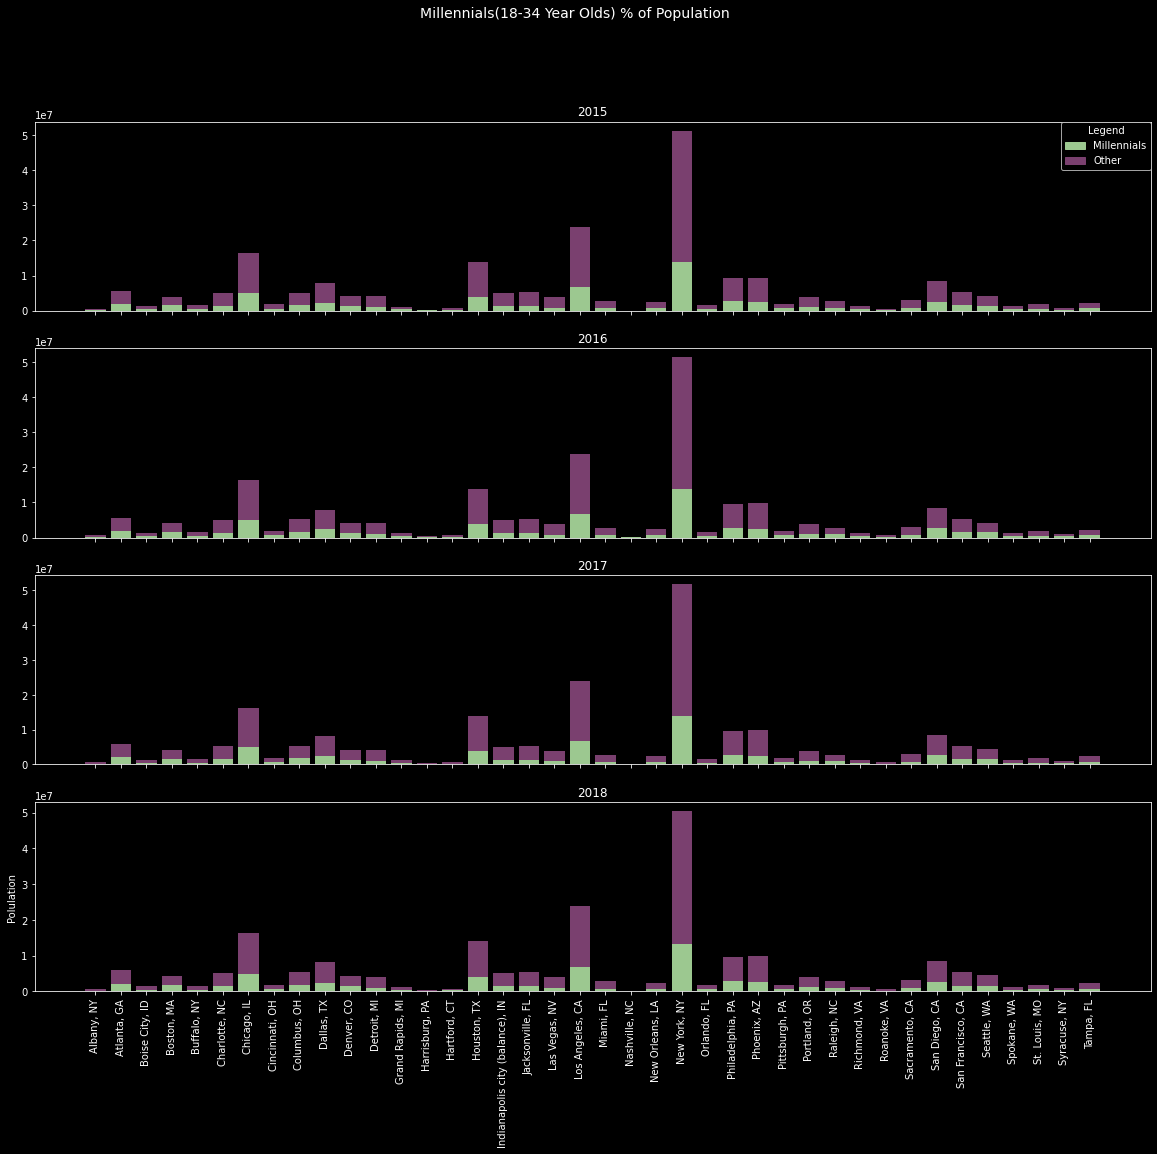

In [370]:
plt.rcParams['figure.figsize']=(20,16)

fig2, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
ax1.bar(age_groupby['City'],age_groupby['2015 Millennials'], color = '#9CC890' )
ax1.bar(age_groupby['City'],age_groupby['2015 Other'], bottom=age_groupby['2015 Millennials'], color='#7A406F')
ax1.set_title('2015')

ax2.bar(age_groupby['City'],age_groupby['2016 Millennials'], color = '#9CC890' )
ax2.bar(age_groupby['City'],age_groupby['2016 Other'], bottom=age_groupby['2016 Millennials'], color='#7A406F')
ax2.set_title('2016')

ax3.bar(age_groupby['City'],age_groupby['2017 Millennials'], color = '#9CC890' )
ax3.bar(age_groupby['City'],age_groupby['2017 Other'], bottom=age_groupby['2017 Millennials'], color='#7A406F')
ax3.set_title('2017')

ax4.bar(age_groupby['City'],age_groupby['2018 Millennials'], color = '#9CC890' )
ax4.bar(age_groupby['City'],age_groupby['2018 Other'], bottom=age_groupby['2018 Millennials'], color='#7A406F')
ax4.set_title('2018')

mil_patch = mpatches.Patch(color='#9CC890', label='Millennials')
non_mil_patch = mpatches.Patch(color='#7A406F', label='Other')
ax1.legend(title='Legend', handles = [mil_patch, non_mil_patch], loc='upper right', fancybox=True, borderaxespad=0)


plt.xticks(rotation=90)
plt.suptitle("Millennials(18-34 Year Olds) % of Population", fontsize=14)
plt.ylabel('Polulation')
plt.show()

In [371]:
avacado_vs_income = pd.merge(avacado_city, income_data, on=['City', 'Year'], how='left')
avacado_vs_income = avacado_vs_income.loc[avacado_vs_income['Year']<=2018]
# avacado_vs_income = avacado_vs_income [['Year','AveragePrice', 'Median Income']]

avacado_vs_income.drop_duplicates(inplace=True)
avacado_vs_income = avacado_vs_income.groupby(['City', 'Year']).mean().reset_index()
avacado_vs_income


,City,Year,AveragePrice,Median Income
0,"Albany, NY",2015,1.538571,40949.0
1,"Albany, NY",2016,1.521905,42335.0
2,"Albany, NY",2017,1.709180,43790.0
3,"Albany, NY",2018,1.406538,45500.0
4,"Atlanta, GA",2015,1.464909,50210.0
...,...,...,...,...
115,"Syracuse, NY",2018,1.238824,36308.0
116,"Tampa, FL",2015,1.360800,44432.0
117,"Tampa, FL",2016,1.238966,50405.0
118,"Tampa, FL",2017,1.647941,50489.0


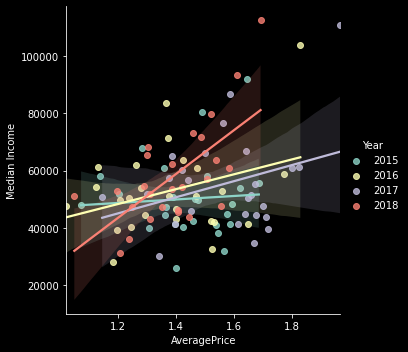

In [372]:



# ax.scatter(avacado_vs_income['Median Income'],avacado_vs_income['AveragePrice'] )
sns.lmplot('AveragePrice', 'Median Income', data=avacado_vs_income, hue='Year')
# avacado_vs_income.plot(kind='scatter', x='AveragePrice', y='Median Income', c=avacado_vs_income['Year'].map(colors))

plt.show()

In [405]:
avacado_vs_age = pd.merge(avacado_city, millennials, on=['City', 'Year'], how='left')
avacado_vs_age = avacado_vs_age.loc[avacado_vs_age['Year']<=2018]
avacado_vs_age = avacado_vs_age[['Year','City', 'Millennials', 'Number in Range','AveragePrice']].rename(columns={'AveragePrice':'Average Price'})
avacado_vs_age.drop_duplicates(inplace=True)
avacado_vs_age = avacado_vs_age.groupby(['City', 'Year', 'Millennials']).mean().reset_index()
avacado_vs_age

,City,Year,Millennials,Number in Range,Average Price
0,"Albany, NY",2015,Millenial,18981.000000,1.538571
1,"Albany, NY",2015,Other,6722.888889,1.538571
2,"Albany, NY",2016,Millenial,19137.000000,1.521905
3,"Albany, NY",2016,Other,6683.444444,1.521905
4,"Albany, NY",2017,Millenial,19083.500000,1.709180
...,...,...,...,...,...
203,"Tampa, FL",2016,Other,30701.666667,1.238966
204,"Tampa, FL",2017,Millenial,51999.500000,1.647941
205,"Tampa, FL",2017,Other,31269.333333,1.647941
206,"Tampa, FL",2018,Millenial,55434.000000,1.290889


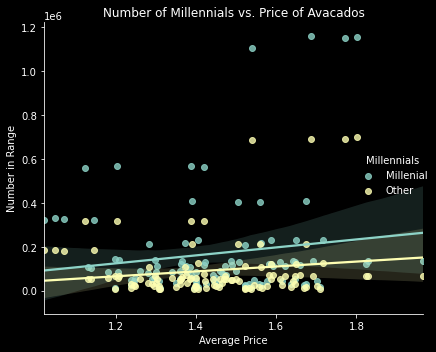

In [409]:
sns.lmplot('Average Price', 'Number in Range', data=avacado_vs_age, hue='Millennials')
plt.title("Number of Millennials vs. Price of Avacados") 
plt.tight_layout() 

NormaltestResult(statistic=16.1782375786211, pvalue=0.0003068600463778004)


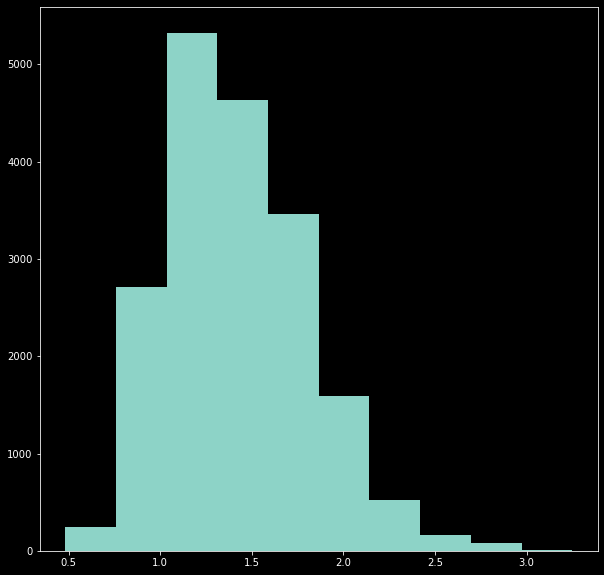

In [388]:
plt.rcParams['figure.figsize']=(10,10)
plt.hist(avacado_data['AveragePrice'])
print(sts.normaltest(avacado_data['AveragePrice'].sample(20)))